In [20]:
import tensorflow as tf

In [69]:
def data_creation(w=0.1, b=0.5, n=100):
    x = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(n,), stddev=0.01)
    
    Y = x*w + b + noise
    
    return x, Y

x, y = data_creation(n=100)

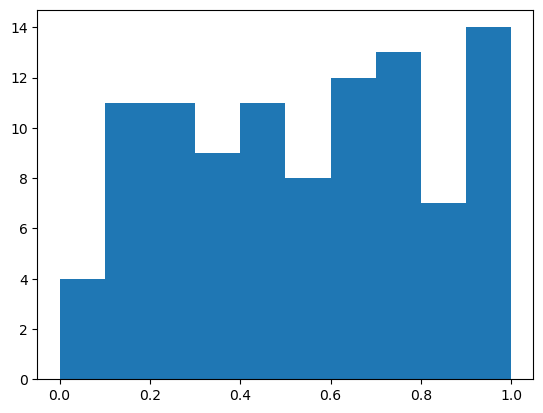

In [70]:
%matplotlib inline
import matplotlib.pyplot as mpl
mpl.hist(x.numpy())
mpl.show()


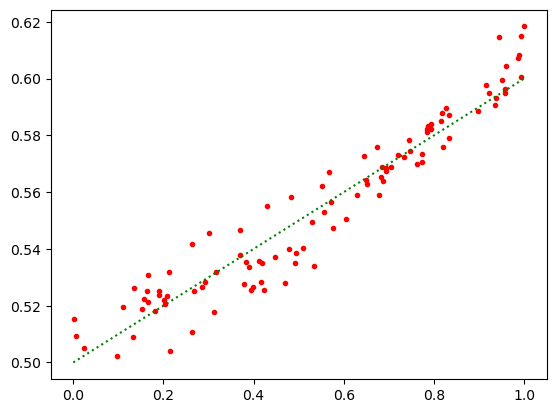

In [106]:
w = 0.1
b = 0.5

mpl.plot(x.numpy(), y.numpy(), 'r.')
mpl.plot([0,1], [0*w+b,1*w+b], 'g:')

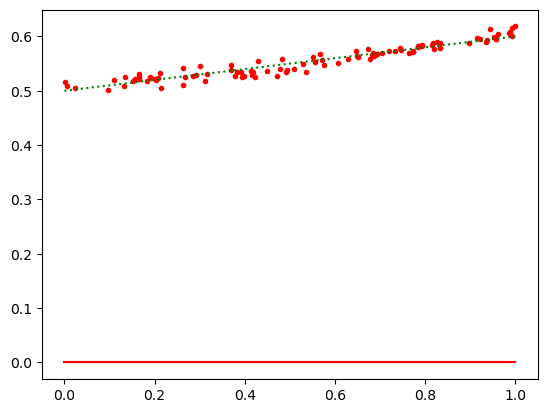

In [107]:
w_guess = 0
b_guess = 0
mpl.plot(x.numpy(), y.numpy(), 'r.')
mpl.plot([0,1], [0*w+b,1*w+b], 'g:')
mpl.plot([0,1], [0*w_guess+b_guess,1*w_guess+b_guess], 'r')

In [119]:
def predict(x, w=w, b=b):
    y = w * x + b
    return y

In [109]:
def mean_square_error(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))    

In [110]:
print(mean_square_error(predict(x), y))

tf.Tensor(0.3084941, shape=(), dtype=float32)


In [112]:
w_guess = 0.1
b_guess = 0.5
print(mean_square_error(predict(x), y))

tf.Tensor(7.363229e-05, shape=(), dtype=float32)


In [153]:
#w = tf.Variable(0.0)
#b = tf.Variable(-1.0)
learning_rate = 0.1 # learning rate is hyper-parameter it controls how the training is happening, not to small not too large
step = 200

for step in range(step): 
    with tf.GradientTape() as tape: # tensor flow create this arithmatical enviorment where now we can do arthmatic ops.
        predictions = predict(x, w=w, b=b)
        loss_function = mean_square_error(predictions, y)
        
    gradients = tape.gradient(loss_function, [w, b])
    
    w.assign_sub(gradients[0]*learning_rate) 
    b.assign_sub(gradients[1]*learning_rate)
    
    if step%20 == 0:
        print("Step {}".format(step))


Step 0
Step 20
Step 40
Step 60
Step 80
Step 100
Step 120
Step 140
Step 160
Step 180


In [150]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.102254525>

In [151]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.4989632>

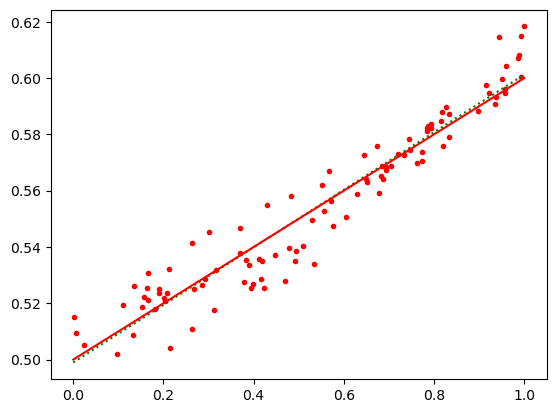

In [154]:
w_true = 0.1
b_true = 0.5
mpl.plot(x.numpy(), y.numpy(), 'r.')
mpl.plot([0,1], [0*w+b,1*w+b], 'g:')
mpl.plot([0,1], [0*w_true+b_true,1*w_true+b_true], 'r')